In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})

In [3]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [5]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
merged_df=rating_df.merge(movies_df, on="movieId")

In [7]:
merged_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [8]:
df_g=merged_df.groupby(['title'])['rating'].count()

In [9]:
df_g.columns=["title","totalratingcount"]

In [10]:
df_g.columns

['title', 'totalratingcount']

In [11]:
rating_with_totalRatingCount = merged_df.merge(df_g, left_on = 'title', right_on = 'title', how = 'left')
### left_on-->tells on which col merged_df is to be merged, how --> gives more imp to left df

In [12]:
rating_with_totalRatingCount.head()

,userId,movieId,rating_x,title,rating_y
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [13]:
rating_with_totalRatingCount.columns=["userId","movieId","rating","title","ratingCount"]

In [14]:
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,ratingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency')

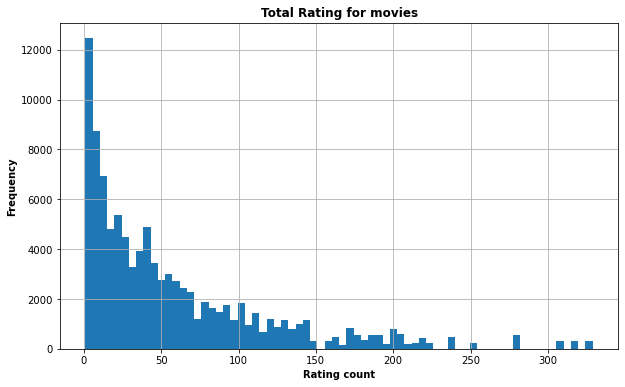

In [25]:
plt.figure(figsize=(10,6))
rating_with_totalRatingCount["ratingCount"].hist(bins=70)
plt.title("Total Rating for movies", weight="bold")
plt.xlabel("Rating count", weight="bold")
plt.ylabel("Frequency", weight="bold")

### discards low rated movies

In [15]:
rating_with_totalRatingCount.shape

(100836, 5)

In [22]:
### setting threshold 50 --> rating count >=50 only considered
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('ratingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,ratingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [23]:
rating_popular_movie.shape

(41362, 5)

In [58]:
## First lets create a Pivot matrix

movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


In [59]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values).toarray()
#movie_features_df_matrix = csr_matrix(movie_features_df.values)
#(x,y)--> value

In [60]:
movie_features_df.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]], dtype=float32)

In [61]:
print(movie_features_df_matrix[1:3])

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 3.  0.  4.5]]


In [62]:
# from scipy.sparse import csr_matrix

# movie_features_df_matrix = csr_matrix(movie_features_df.values)   ### into an array(flatten)

from sklearn.neighbors import NearestNeighbors  ### not classifier or regressor


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [63]:
query_index = np.random.choice(movie_features_df.shape[0])  ## picks random movie for its recommendation
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 11)
### reshape converts series to flatten form
###n_neighbors decides no of similar neighbors

46


In [64]:
for i in range(0, len(distances.flatten())):
    if i==0:
        print("Recommendations for {0}:\n".format(movie_features_df.index[query_index]))
    else:
        print("{0}: {1}, with distance of {2}.\n".format(i,movie_features_df.index[indices.flatten()[i]], distances.flatten()[i] ))

Recommendations for Patriot, The (2000):

1: RoboCop (1987), with distance of 0.4652875065803528.

2: Die Hard 2 (1990), with distance of 0.4986003637313843.

3: Starship Troopers (1997), with distance of 0.5077357888221741.

4: Men in Black (a.k.a. MIB) (1997), with distance of 0.5097613334655762.

5: Con Air (1997), with distance of 0.5107257962226868.

6: Who Framed Roger Rabbit? (1988), with distance of 0.5125819444656372.

7: Total Recall (1990), with distance of 0.5152316689491272.

8: Mummy, The (1999), with distance of 0.5172202587127686.

9: Blade (1998), with distance of 0.5198857188224792.

10: Indiana Jones and the Temple of Doom (1984), with distance of 0.5218517780303955.



In [57]:
del model_knn